In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MeanShift, DBSCAN
import collections
from sklearn import metrics
import pickle

In [21]:
full_dataset = pd.read_csv('wine-clustering.csv')
full_dataset.describe()
full_dataset_Normalizer = Normalizer().fit_transform(full_dataset.values)

In [15]:
kmeans = KMeans(n_clusters = 3, n_init = 10, max_iter = 1000)
Y_pred_Normalizer = kmeans.fit_predict(full_dataset_Normalizer)
full_dataset_with_clusters = full_dataset.copy()
full_dataset_with_clusters['Normalizer'] = Y_pred_Normalizer

In [22]:
full_dataset_with_clusters

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Normalizer
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [17]:
silhouette_normalizer = metrics.silhouette_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(silhouette_normalizer)
davies_bouldin_normalizer = metrics.davies_bouldin_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(davies_bouldin_normalizer)
calinski_normalizer = metrics.calinski_harabasz_score(full_dataset_Normalizer,Y_pred_Normalizer)
print(calinski_normalizer)

0.5233461282286351
0.6080816722167729
412.8860772797459


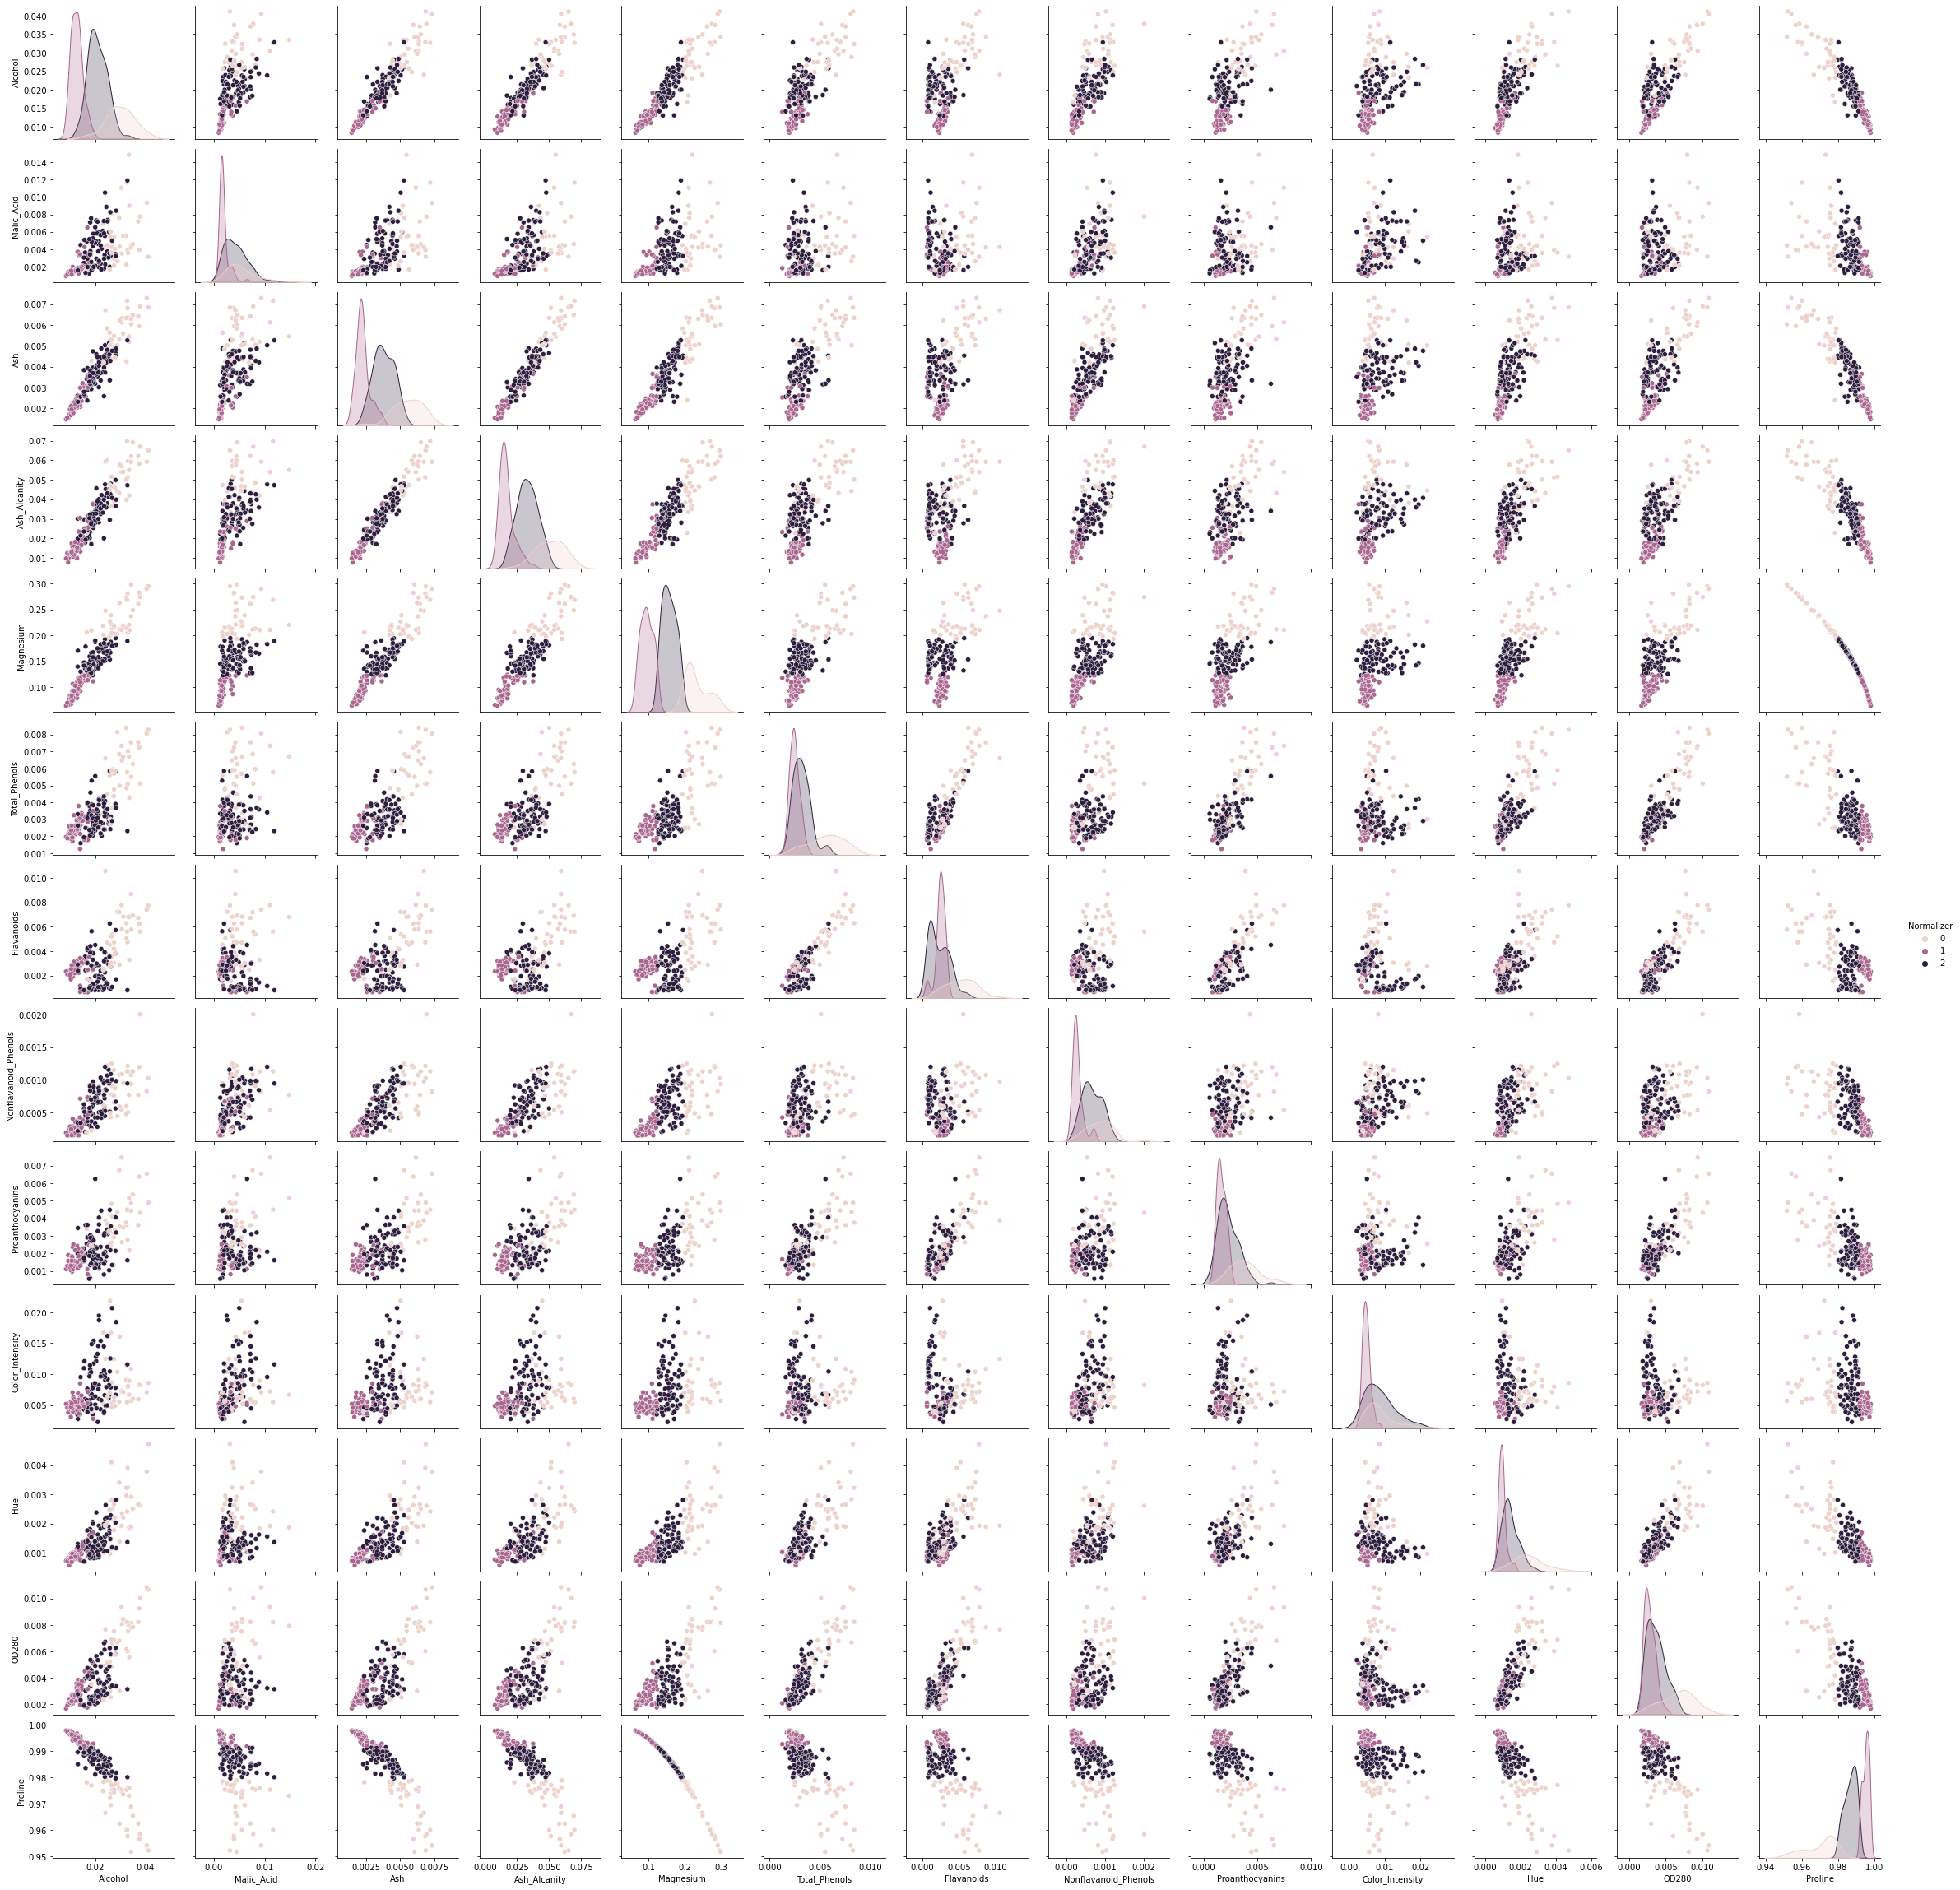

In [18]:
dataset_plot_graphs = pd.DataFrame(full_dataset_Normalizer,columns=full_dataset.columns)
dataset_plot_graphs['Normalizer'] = Y_pred_Normalizer
sns.pairplot(dataset_plot_graphs[:],hue='Normalizer')

In [27]:
pickle.dump(Normalizer(), open('normalizer.sav', 'wb'))
pickle.dump(kmeans, open('classifier.sav','wb'))

Testing if the Normalizer and KMeans would work properly:

In [33]:
Normalizer().transform([list(full_dataset.iloc[0])])

array([[1.32644724e-02, 1.59397384e-03, 2.26512072e-03, 1.45415157e-02,
        1.18382852e-01, 2.61001565e-03, 2.85237424e-03, 2.61001565e-04,
        2.13461994e-03, 5.25731723e-03, 9.69434383e-04, 3.65402190e-03,
        9.92738094e-01]])

In [35]:
full_dataset_Normalizer[0]

array([1.32644724e-02, 1.59397384e-03, 2.26512072e-03, 1.45415157e-02,
       1.18382852e-01, 2.61001565e-03, 2.85237424e-03, 2.61001565e-04,
       2.13461994e-03, 5.25731723e-03, 9.69434383e-04, 3.65402190e-03,
       9.92738094e-01])

In [37]:
kmeans.predict([full_dataset_Normalizer[0]])

array([1])

In [38]:
Y_pred_Normalizer[0]

1